In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL of the CSV file
url = "https://raw.githubusercontent.com/Naik-Khyati/608/main/story7/stgc_minerals.csv"

# Read the CSV file into a DataFrame with 'ISO-8859-1' encoding
df = pd.read_csv(url, encoding='ISO-8859-1')

df.shape

(37, 7)

In [8]:
# Display the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   crit_elem          37 non-null     object 
 1   import_pct         37 non-null     object 
 2   import_source      33 non-null     object 
 3   reliance_cat_desc  34 non-null     object 
 4   reliance_cat       34 non-null     float64
 5   import_cat_desc    34 non-null     object 
 6   import_cat         34 non-null     float64
dtypes: float64(2), object(5)
memory usage: 2.1+ KB


In [9]:
# Replace 'Net exporter' with 1.1 in 'import_pct'
df['import_pct'].replace('Net exporter', 1.1, inplace=True)

# Replace 'No data available' with NaN in 'import_pct'
df['import_pct'].replace('No data available', pd.NA, inplace=True)

# Convert 'import_pct' to numeric (assuming it contains numbers)
df['import_pct'] = pd.to_numeric(df['import_pct'], errors='coerce')

# Remove rows where 'import_pct' is NaN
df = df.dropna(subset=['import_pct'])

# Display the updated DataFrame
df.shape

(34, 7)

<ipython-input-10-a88fc419de8c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['import_source_clean'] = df['import_source'].str.replace('[^a-zA-Z0-9\s]', '').str.strip()
<ipython-input-10-a88fc419de8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['import_source_clean'] = df['import_source'].str.replace('[^a-zA-Z0-9\s]', '').str.strip()


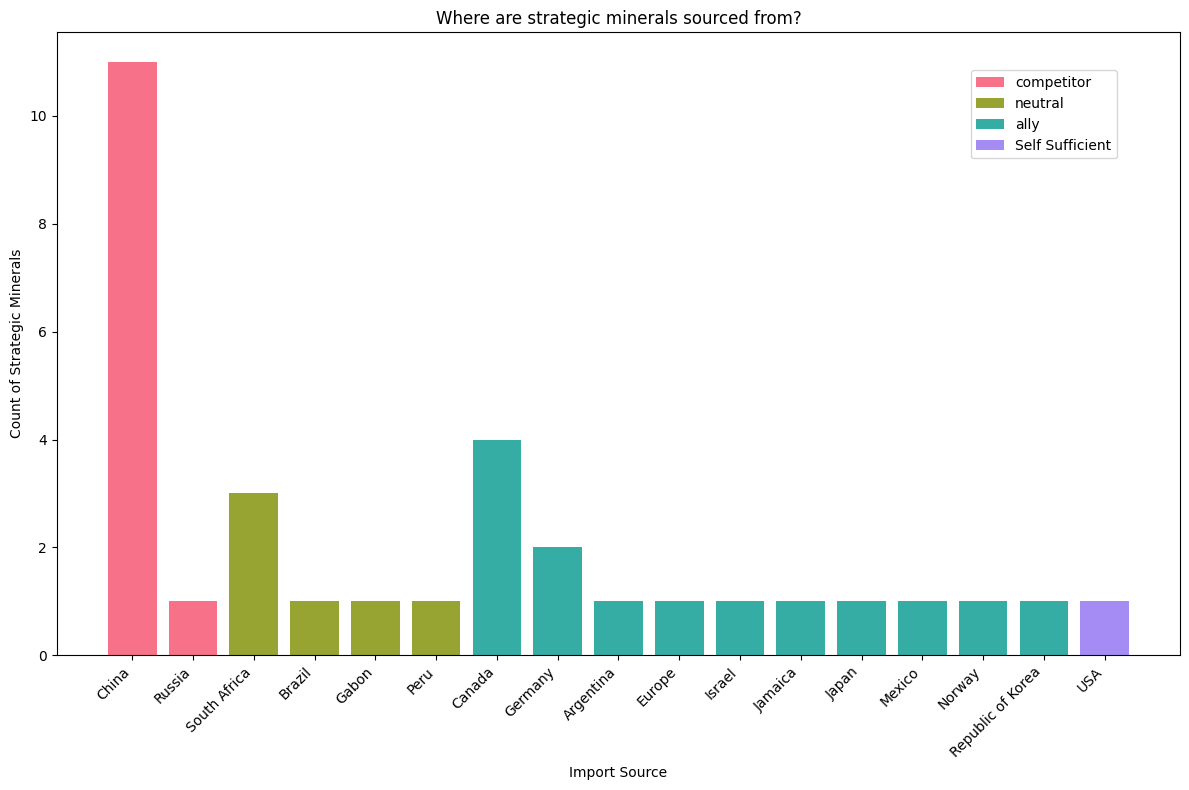

In [10]:
# Clean 'import_source' column by removing special characters and extra spaces
df['import_source_clean'] = df['import_source'].str.replace('[^a-zA-Z0-9\s]', '').str.strip()

# Define the order of 'reliance_cat_desc'
reliance_cat_order = ['competitor',  'neutral','ally','Self Sufficient' ]

# Group by 'import_source_clean', 'reliance_cat_desc' and calculate the count of 'crit_elem'
import_source_counts = df.groupby(['import_source_clean', 'reliance_cat_desc'])['crit_elem'].count().reset_index(name='count')

# Sort the data by 'reliance_cat_desc' and count in descending order
import_source_counts = import_source_counts.sort_values(by=['reliance_cat_desc', 'count'], ascending=[True, False])

# Set the color palette based on 'reliance_cat_desc'
colors = sns.color_palette('husl', n_colors=len(df['reliance_cat_desc'].unique()))

# Create a bar chart with colored bars
plt.figure(figsize=(12, 8))
for idx, cat_desc in enumerate(reliance_cat_order):
    data = import_source_counts[import_source_counts['reliance_cat_desc'] == cat_desc]
    plt.bar(data['import_source_clean'], data['count'], label=cat_desc, color=colors[idx])

plt.xlabel('Import Source')
plt.ylabel('Count of Strategic Minerals')
plt.title('Where are strategic minerals sourced from?')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(bbox_to_anchor=(0.95, 0.95))

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
# Sorting import_cat from high to low, and reliance_cat from low to high
df_sorted = df.sort_values(by=['import_cat', 'reliance_cat'], ascending=[False, True])

# Creating a pivot table with counts
pivot_table = pd.pivot_table(df_sorted, values='crit_elem', index='import_cat', columns='reliance_cat', aggfunc='count', fill_value=0)

# Reversing the order of 'import_cat' values in the index
pivot_table = pivot_table.iloc[::-1]

pivot_table

reliance_cat,0.0,1.0,2.0,3.0
import_cat,,,,
3.0,0,8,4,8
2.0,0,4,1,1
1.0,1,2,1,3
0.0,1,0,0,0


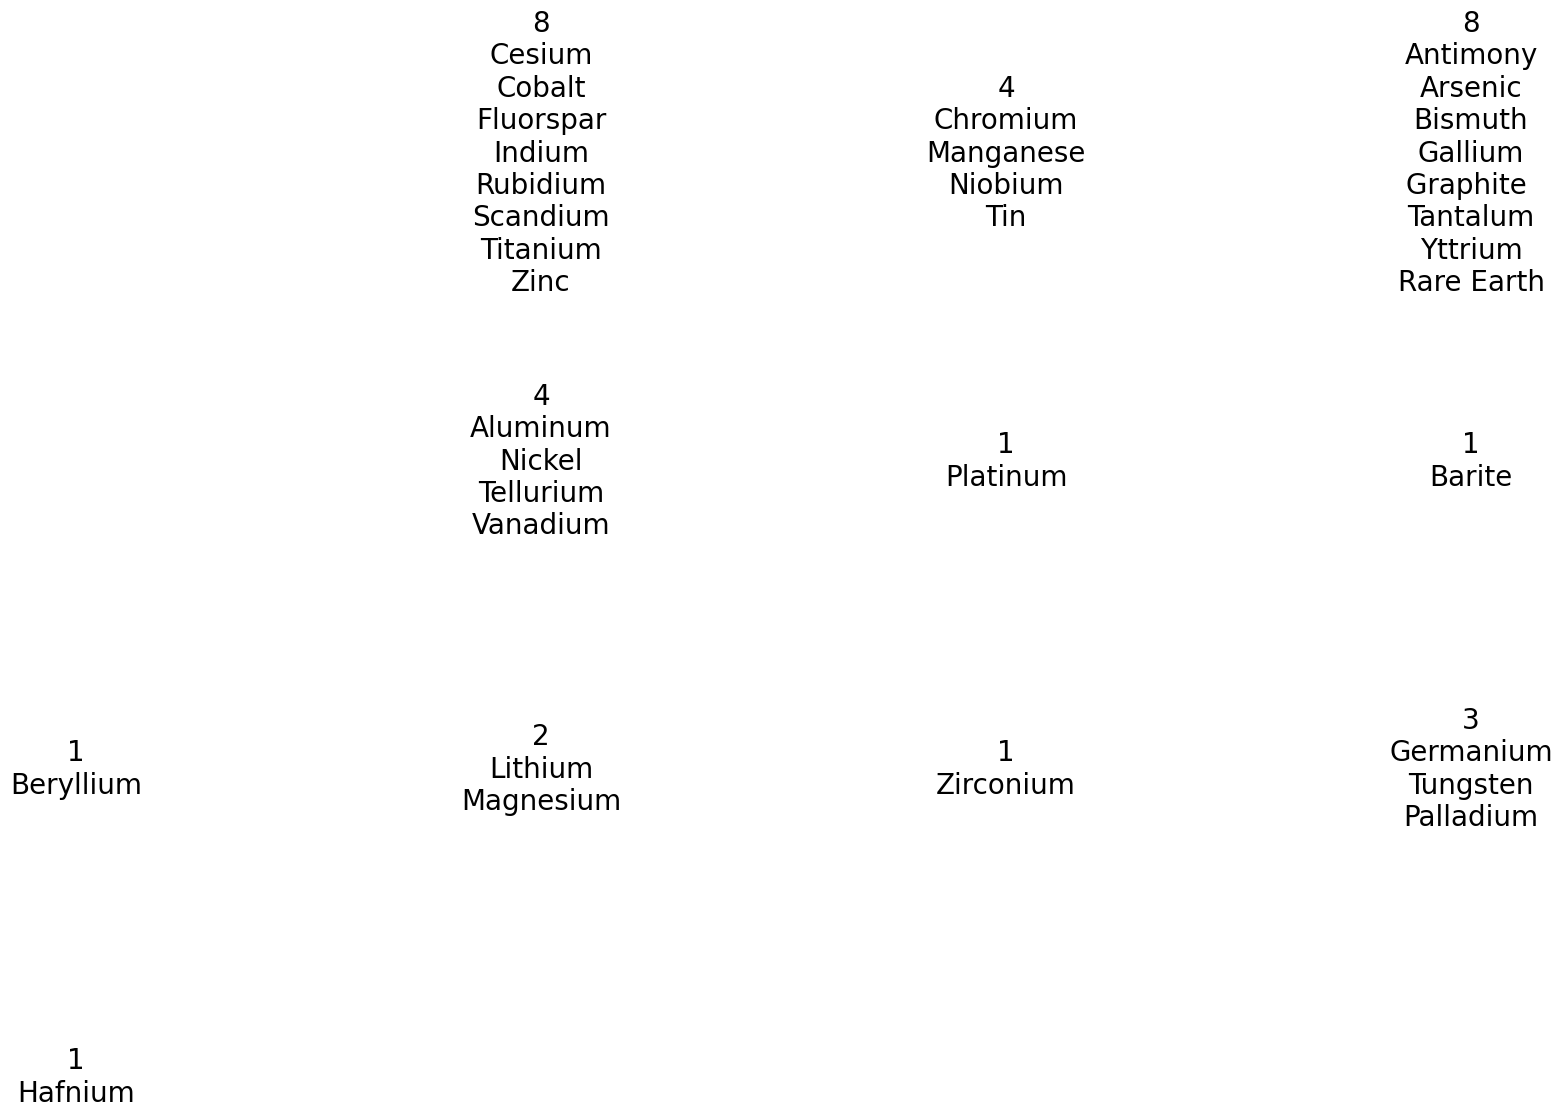

In [12]:
# Sorting import_cat from high to low, and reliance_cat from low to high
df_sorted = df.sort_values(by=['import_cat', 'reliance_cat'], ascending=[False, True])

# Group by 'import_cat' and 'reliance_cat' and calculate the count of 'crit_elem'
bubble_data = df_sorted.groupby(['import_cat', 'reliance_cat'])['crit_elem'].agg(list).reset_index(name='crit_elem_list')
bubble_data['count'] = bubble_data['crit_elem_list'].apply(len)

# Reverse the order of 'import_cat' values
bubble_data['import_cat_reverse'] = bubble_data['import_cat'].max() - bubble_data['import_cat']

# Create a scatter plot with bigger bubbles filled with white color
plt.figure(figsize=(6, 4))

# Set integer values on axes
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

# Label the count of crit_elem on each point with larger font size
for i, row in bubble_data.iterrows():
    count_label = str(int(row['count']))
    crit_elem_label = '\n'.join(row['crit_elem_list'])
    label = f"{count_label}\n{crit_elem_label}"
    plt.text(row['reliance_cat'], row['import_cat_reverse'], label, ha='center', va='center', fontsize=20, color='black')

# Remove x-axis and y-axis labels
plt.xlabel('')
plt.ylabel('')

# Remove chart border
plt.box(on=None)

# Invert y-axis to have higher values at the top
plt.gca().invert_yaxis()

# Remove ticks for a cleaner appearance
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

# Show the plot
plt.show()
